In [22]:
import torch
from torchvision import datasets, transforms
import helper

Downloading the data!

In [23]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

This is how ine of the images look like:

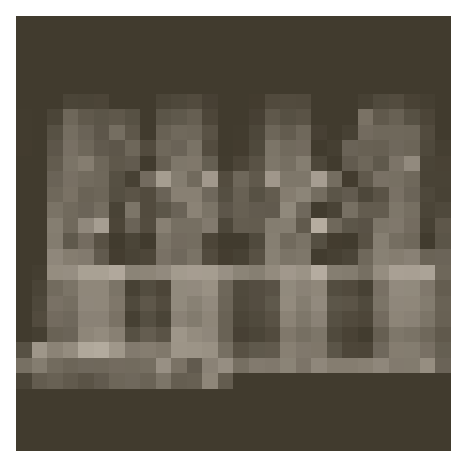

In [24]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

### Building the network:

In [25]:
from torch import nn, optim
import torch.nn.functional as F

In [26]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

### Training the network:

In [27]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [28]:
epochs = 10

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.513751921734449
Training loss: 0.39607612825215244
Training loss: 0.35633775820610114
Training loss: 0.33748935761927035
Training loss: 0.315768247442459
Training loss: 0.3015257630155666
Training loss: 0.29350618809969947
Training loss: 0.2825420507426455
Training loss: 0.27938489602414024
Training loss: 0.26704647562015793


### Testing the network:

In [31]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import helper

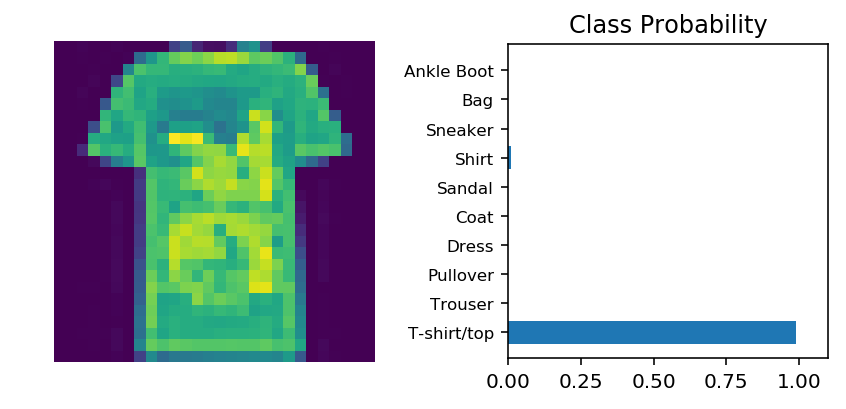

In [59]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

ps = torch.exp(model(img))
helper.view_classify(img, ps, version='Fashion')

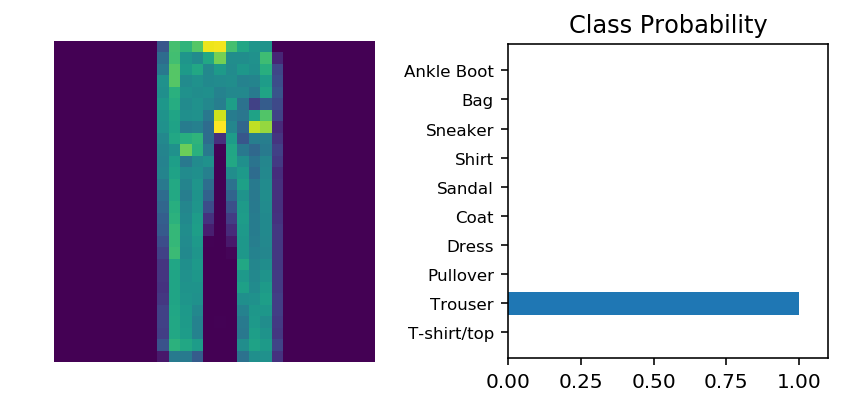

In [40]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

ps = torch.exp(model(img))
helper.view_classify(img, ps, version='Fashion')

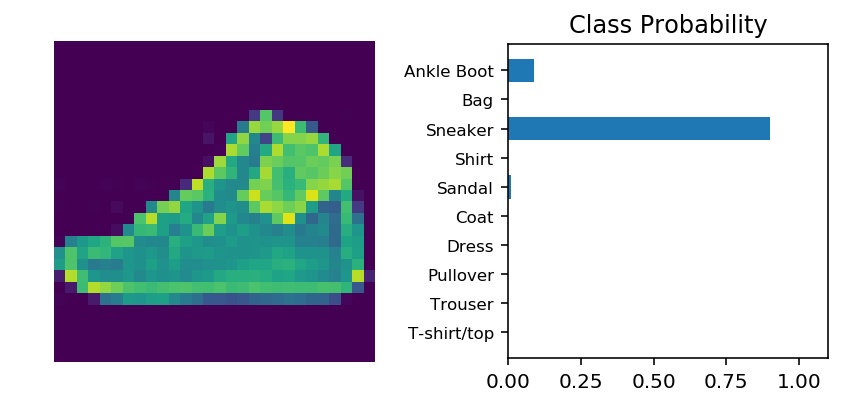

In [56]:
dataiter = iter(testloader)
images, labels = dataiter.next()

img = images[1]

ps = torch.exp(model(img))
helper.view_classify(img, ps, version='Fashion')